
# **Python SQL Data Visualization Project**

*INFORM — PhD in Health Data Science — FMUP 2024/2025*

<br>

## Introduction

Clinical analyses are a routine procedure in medicine that are able to provide a lot of information with a simple procedure. The chosen database includes data on several biomarkers and the alchohol consumption of the respective patient.

The objective of this Project is to use Pyhton, SQL, DuckDB, and Google Colab to create interesting data visualizations using the data in the dataset.

<br>

## Dataset Information

The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.




| Variable | Type | Description |
| --- | --- | --- |
| mcv | Cont | mean corpuscular volume |
| alkphos | Cont | alkaline phosphotase |
| sgpt | Cont | alanine aminotransferase |
| sgot | Cont | aspartate aminotransferase |
| gammagt | Cont | gamma-glutamyl transpeptidase |
| drinks | Cont | Continuous	number of half-pint equivalents of alcoholic beverages drunk per day |
| selector | Cat | Other	Categorical	field created by the BUPA researchers to split the data into train/test sets |

<br>

<small> The dataset used was downloaded from:
https://archive.ics.uci.edu/dataset/60/liver+disorders </small>


## Environment setup

In [185]:
# run this everytime you open the window (it resets everytime you close the tab)
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

In [186]:
# import libraries - like library() in R

import duckdb
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# first create connection (just needed once)
conn = duckdb.connect()

## Preparing the Database

In [187]:
# create table with data
# DROP TABLE allows reruns of the same cell even if it has been previously run
# column6 purposefully not selected as it will have no use
query = """
DROP TABLE IF EXISTS mytable;
CREATE TABLE mytable AS
SELECT
    column0 AS mcv,
    column1 AS alkphos,
    column2 AS sgpt,
    column3 AS sgot,
    column4 AS gammagt,
    column5 AS drinks,
FROM read_csv_auto('bupa.data');
"""

# Creates table (executes the previous query)
conn.execute(query)

## selects everything from the table
query = """
SELECT *
FROM mytable
"""

## executes the query and create a datafram from it.
df = conn.sql(query).df()
df


,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


## Data Summarization

**Data Overview:** Descriptive Statistics

**Data Cleaning:** Missing values, Duplicate Values, Inconsistencies



In [188]:
# Descriptive Statistics
print("Descriptive Statistics\n")
summary = df.describe().round(3)
print(summary)

Descriptive Statistics

           mcv  alkphos     sgpt     sgot  gammagt   drinks
count  345.000  345.000  345.000  345.000  345.000  345.000
mean    90.159   69.870   30.406   24.643   38.284    3.455
std      4.448   18.348   19.512   10.064   39.255    3.338
min     65.000   23.000    4.000    5.000    5.000    0.000
25%     87.000   57.000   19.000   19.000   15.000    0.500
50%     90.000   67.000   26.000   23.000   25.000    3.000
75%     93.000   80.000   34.000   27.000   46.000    6.000
max    103.000  138.000  155.000   82.000  297.000   20.000


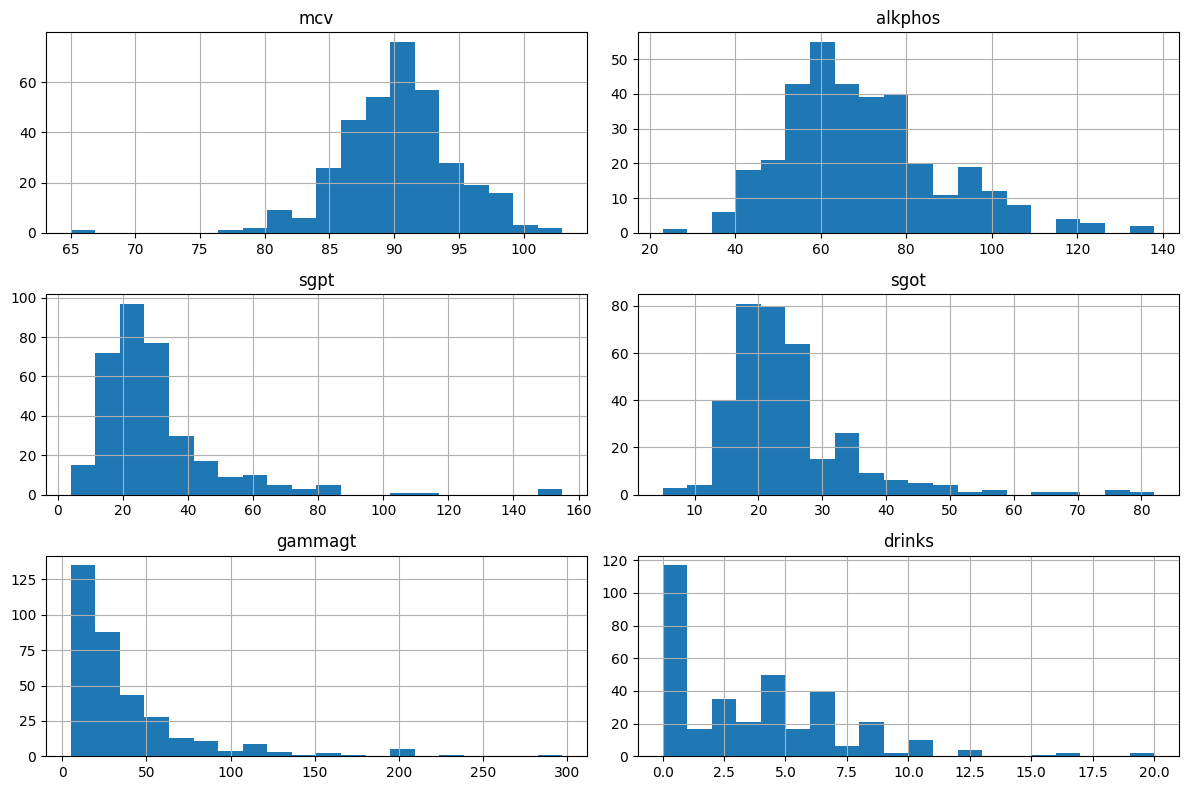

In [189]:
# Distribution of the Variables
df.hist(figsize=(12, 8), bins=20)   # Adjust figsize and bins as needed
plt.tight_layout()                  # To prevent overlapping labels
plt.show()

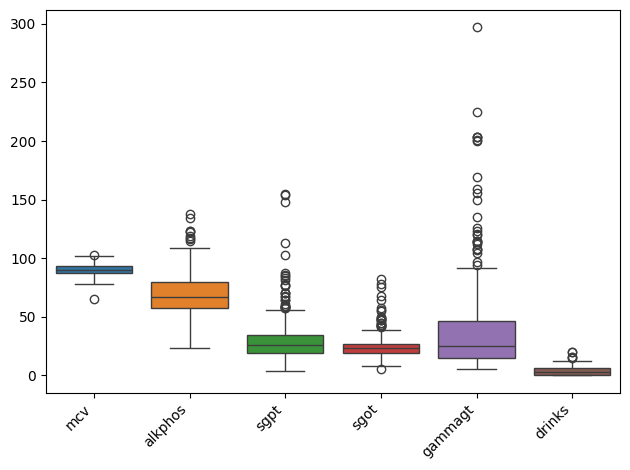

In [190]:
# Boxplot of all variables
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [191]:
# Find missing values
print("Missing Values\n")
missing_values = df.isnull().sum()
print(missing_values)

Missing Values

mcv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
drinks     0
dtype: int64


In [192]:
# Find duplicate values
print("Duplicate Values\n")
duplicates = df[df.duplicated()]
print(duplicates)

Duplicate Values

     mcv  alkphos  sgpt  sgot  gammagt  drinks
85    94       58    21    18       26     2.0
149   91       63    25    26       15     6.0
175   97       71    29    22       52     8.0
317   92       80    10    26       20     6.0


Since it is feasible that more than one person could share the exact same results as another and there is no unique identifier in the data, the identified duplicates were not removed.

## Data Vizualization

### Before Alcohol

<Axes: ylabel='Count'>

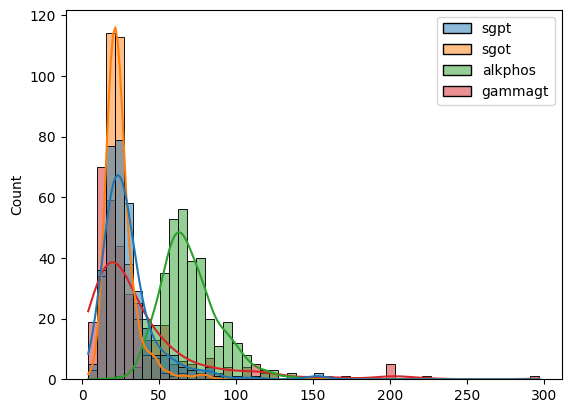

In [193]:
query = (
    """
        select sgpt, sgot, alkphos, gammagt from mytable """
)

tworesult = conn.sql(query).df()

sns.histplot(tworesult, kde=True, bins=50, color="blue", label="x")


The distribuition of all four variables: sgpt, sgot, alkphos, gammagt

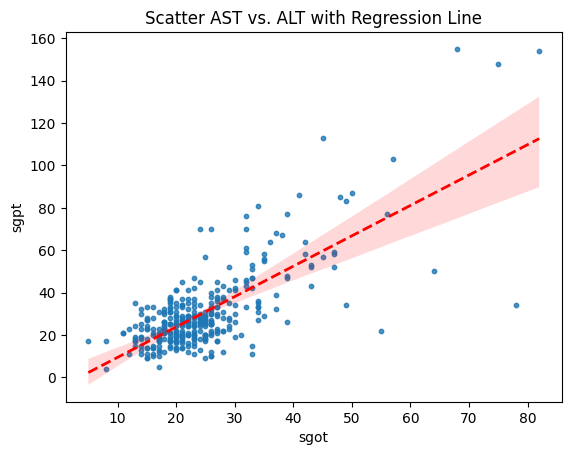

In [194]:
# AST ALT scatterplot and regression line
sns.regplot(data=df,
            x="sgot",
            y="sgpt",
            scatter_kws={'s': 10},
            line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})

plt.title("Scatter AST vs. ALT with Regression Line")
plt.xlabel("sgot")
plt.ylabel("sgpt")
plt.show()

AST (sgot) and ALT (sgpt) are enzimes associated with hepatic stress and when they change, they usually accompany one another, as seen above.


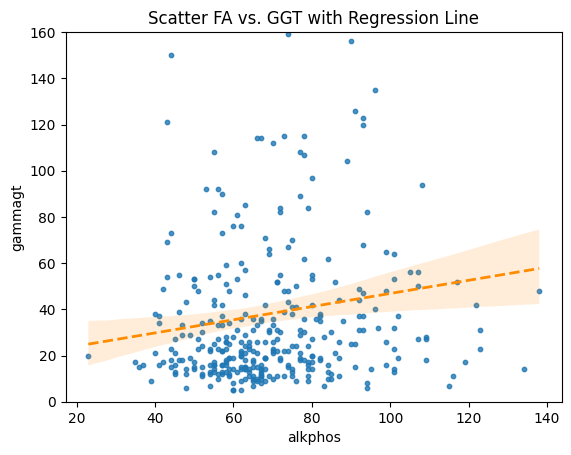

In [195]:
# FA GGT scatterplot and regression line
sns.regplot(data=df,
            x="alkphos",
            y="gammagt",
            scatter_kws={'s': 10},
            line_kws={'color': 'darkorange', 'linestyle': '--', 'linewidth': 2})

plt.title("Scatter FA vs. GGT with Regression Line")
plt.xlabel("alkphos")
plt.ylabel("gammagt")
plt.ylim(0, 160)
plt.show()

FA (alkphos) and GGT (gammagt) are associated with biliar lesion, and their changes are also usually paired with one another.

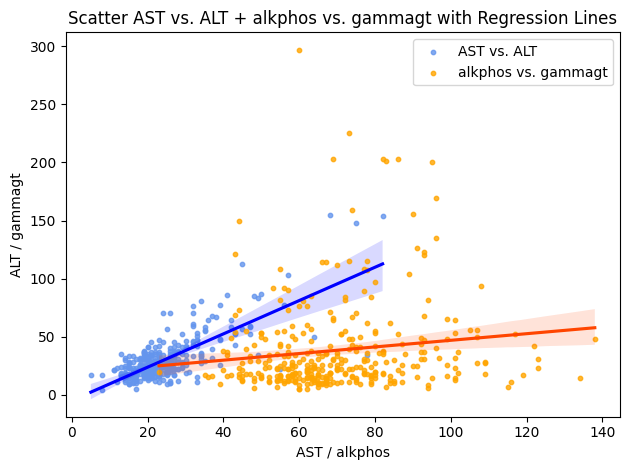

In [196]:
# Plot the first graph
sns.regplot(x="sgot", y="sgpt", data=df,
            scatter_kws={'s': 10, 'color':'cornflowerblue'}, line_kws={'color': 'blue'},
            label='AST vs. ALT')
plt.title("Scatter AST vs. ALT + alkphos vs. gammagt with Regression Lines")

# Plot the second graph
sns.regplot(x="alkphos", y="gammagt", data=df,
            scatter_kws={'s': 10,'color':'orange'},line_kws={'color': 'orangered'},
            label='alkphos vs. gammagt')
plt.xlabel("AST / alkphos")
plt.ylabel("ALT / gammagt")
plt.legend()

plt.tight_layout()
plt.show()

The AST vs. ALT (blue) pair rises faster than the alkphos vs. gammagt (orange) pair.

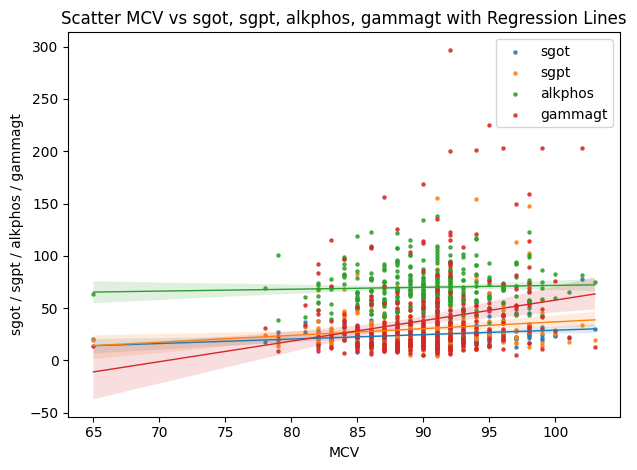

In [197]:
# Plot the first graph
sns.regplot(x="mcv", y="sgot", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='sgot')

# Plot the second graph
sns.regplot(x="mcv", y="sgpt", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='sgpt')

# Plot the third graph
sns.regplot(x="mcv", y="alkphos", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='alkphos')

# Plot the forth graph
sns.regplot(x="mcv", y="gammagt", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='gammagt')

plt.title("Scatter MCV vs sgot, sgpt, alkphos, gammagt with Regression Lines")
plt.legend()
plt.xlabel("MCV")
plt.ylabel("sgot / sgpt / alkphos / gammagt")
plt.tight_layout()
plt.show()

MCV does not seem to have a correlation with either of the other 4 variables.

### After Alcohol

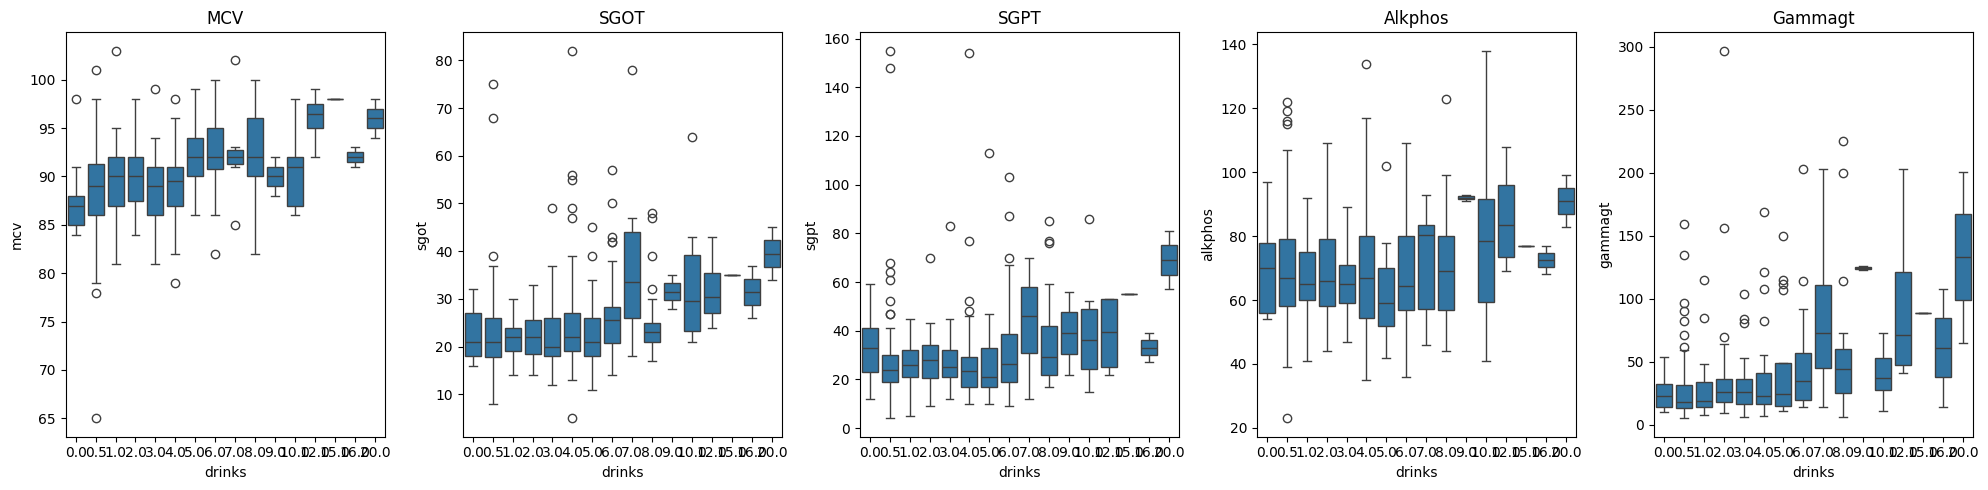

In [198]:
# Create a figure and axes with 5 subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True)  # Adjust figsize as needed

# Plot each boxplot on a separate subplot
sns.boxplot(x=df["drinks"], y=df["mcv"], ax=axes[0])
sns.boxplot(x=df["drinks"], y=df["sgot"], ax=axes[1])
sns.boxplot(x=df["drinks"], y=df["sgpt"], ax=axes[2])
sns.boxplot(x=df["drinks"], y=df["alkphos"], ax=axes[3])
sns.boxplot(x=df["drinks"], y=df["gammagt"], ax=axes[4])

# Customize subplot titles and labels (optional)
axes[0].set_title("MCV")
axes[1].set_title("SGOT")
axes[2].set_title("SGPT")
axes[3].set_title("Alkphos")
axes[4].set_title("Gammagt")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Average number os drinks seems to have a slight correlation with higher levels of all variable

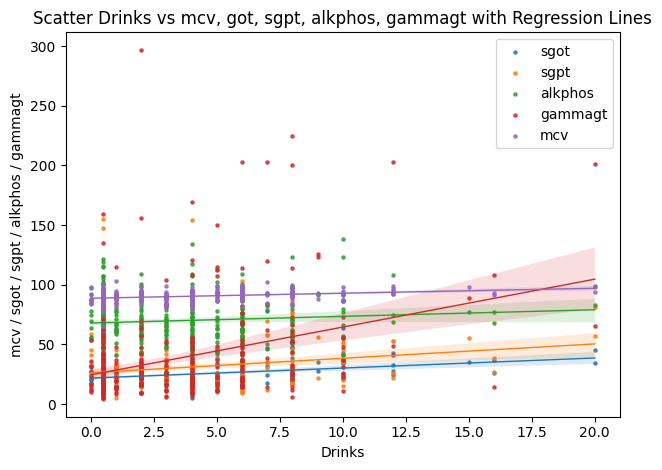

In [199]:
# Plot the first graph
sns.regplot(x="drinks", y="sgot", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='sgot')

# Plot the second graph
sns.regplot(x="drinks", y="sgpt", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='sgpt')

# Plot the third graph
sns.regplot(x="drinks", y="alkphos", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='alkphos')

# Plot the forth graph
sns.regplot(x="drinks", y="gammagt", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='gammagt')

# Plot the fifth graph
sns.regplot(x="drinks", y="mcv", data=df,
            scatter_kws={'s': 5}, line_kws={'linewidth': '1'},
            label='mcv')

plt.title("Scatter Drinks vs mcv, got, sgpt, alkphos, gammagt with Regression Lines")
plt.legend()
plt.xlabel("Drinks")
plt.ylabel("mcv / sgot / sgpt / alkphos / gammagt")
plt.tight_layout()
plt.show()

In this case, alcholol consumption seems to be more strongly tied to higher gammagt when compared to the rest of the variables.

In [200]:
fig = px.scatter(
    df,
    x="sgot",
    y="sgpt",
    color="drinks",
    hover_name="drinks",
    log_x=True,
    log_y=True )
fig

Average number of drinks seem to cluster on higher sgot/sgpt

# DRAFT CODE

For reference only.

<small> **PLEASE IGNORE EVERYTHING BELOW THIS LINE**.

---

<Axes: xlabel='drinks', ylabel='mcv'>

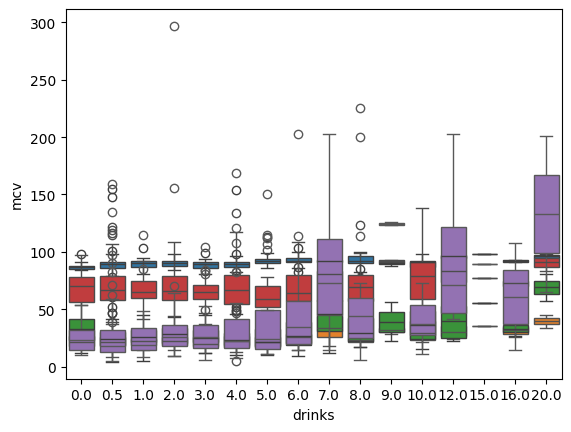

In [206]:
sns.boxplot(x=df["drinks"], y=df["mcv"])
sns.boxplot(x=df["drinks"], y=df["sgot"])
sns.boxplot(x=df["drinks"], y=df["sgpt"])
sns.boxplot(x=df["drinks"], y=df["alkphos"])
sns.boxplot(x=df["drinks"], y=df["gammagt"])

<Axes: xlabel='drinks', ylabel='mcv'>

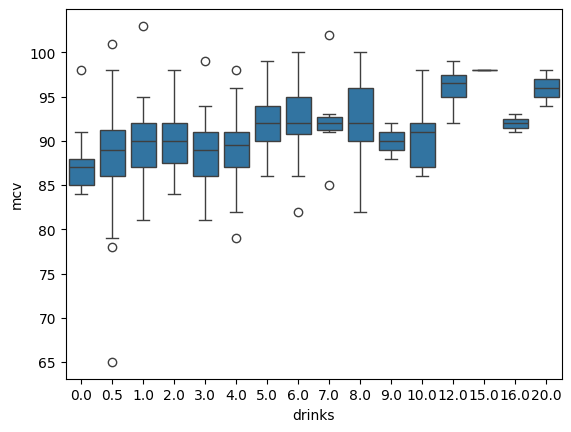

In [207]:
sns.boxplot(data=df, x="drinks", y="mcv")

<Axes: xlabel='drinks', ylabel='mcv'>

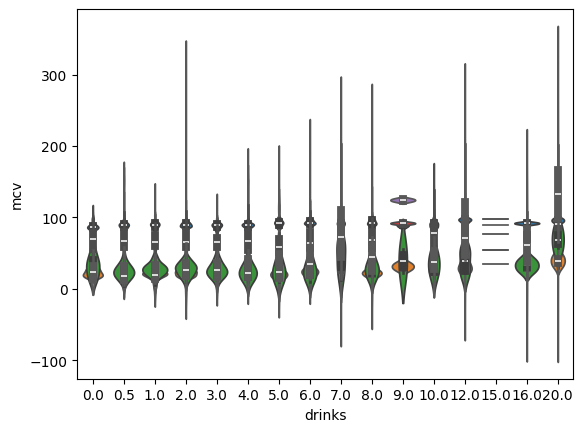

In [208]:
sns.violinplot(x=df["drinks"], y=df["mcv"])
sns.violinplot(x=df["drinks"], y=df["sgot"])
sns.violinplot(x=df["drinks"], y=df["sgpt"])
sns.violinplot(x=df["drinks"], y=df["alkphos"])
sns.violinplot(x=df["drinks"], y=df["gammagt"])

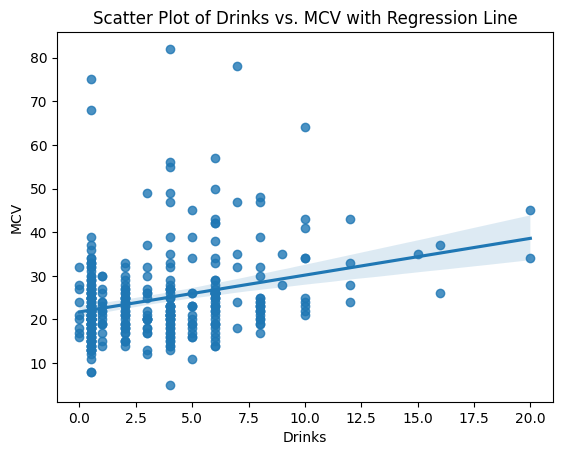

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with regression line
sns.regplot(x="drinks", y="sgot", data=df)
plt.title("Scatter Plot of Drinks vs. MCV with Regression Line")
plt.xlabel("Drinks")
plt.ylabel("MCV")
plt.show()

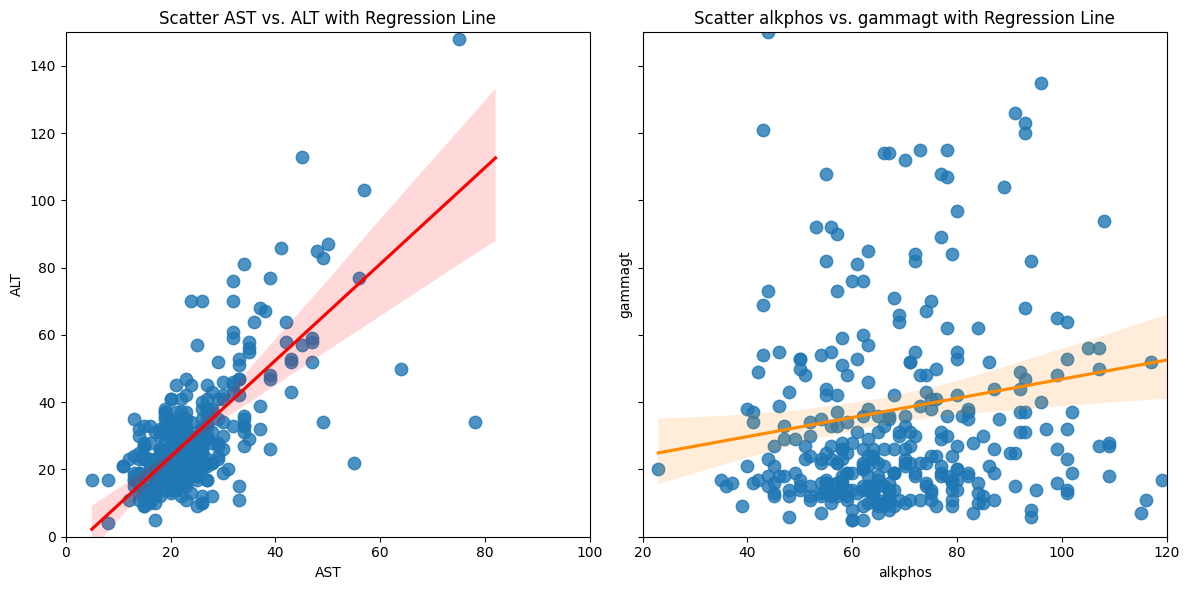

In [210]:
# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # sharey=True for fixed y-axis scale

# Plot the first graph on the left subplot (axes[0])
sns.regplot(x="sgot", y="sgpt", data=df, ax=axes[0], scatter_kws={'s': 80}, line_kws={'color': 'red'})
axes[0].set_title("Scatter AST vs. ALT with Regression Line")
axes[0].set_xlabel("AST")
axes[0].set_ylabel("ALT")
axes[0].set_ylim(0,150) #limit y axis
axes[0].set_xlim(0,100)

# Plot the second graph on the right subplot (axes[1])
sns.regplot(x="alkphos", y="gammagt", data=df, ax=axes[1], scatter_kws={'s': 80}, line_kws={'color': 'darkorange'})
axes[1].set_title("Scatter alkphos vs. gammagt with Regression Line")
axes[1].set_xlabel("alkphos")
axes[1].set_ylabel("gammagt")
axes[1].set_ylim(0,150) #limit y axis
axes[1].set_xlim(20,120)

plt.tight_layout()
plt.show()